# Time Series Analysis
## Seasonal ARIMA model
Reference: https://www.statsmodels.org/dev/index.html

In [1]:
import warnings

import numpy as np
import pandas as pd
import statsmodels.api as sm

from models import arima

warnings.filterwarnings('ignore')

In [2]:
# Import data
path = 'data/^GSPC.csv'
series = pd.read_csv(path, index_col=['Date'], skiprows=None, parse_dates=['Date'])
data = series['Adj Close']

Non-seasonal integral d = 1
Season length s = 0


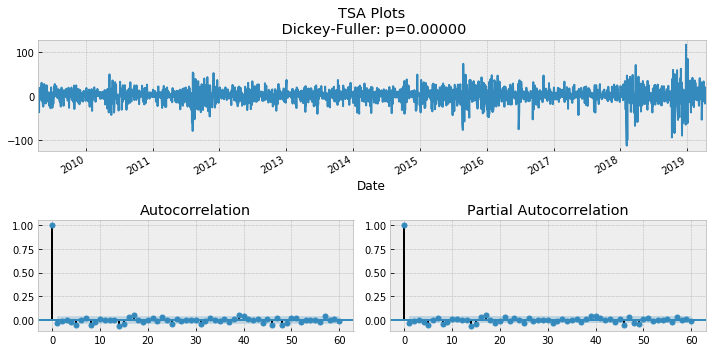

In [3]:
# Remove trend and seasonality, find optimal (d, ds, s)
d, ds, s = arima.seasonality(data, optimize=True, graph=True)

# Out-of-sample num of periods to forecast
n_predict = 2

# Initialize ranges of SARIMA parameters
p = range(5)
q = range(5)

if ds == 0:
    ps, qs = [0], [0]
else:
    ps = range(3)
    qs = range(3)

In [4]:
%%time

# Optimize model
p, q, ps, qs = arima.optimize(data, p, d, q, ps, ds, qs, s, display=True)


Number of combinations = 25

(p, q, P, Q) |     AIC      |  Iteration  
(0, 1, 0, 0) |   21292.64   |     2/25    
(1, 1, 0, 0) |   21290.51   |     7/25    
(4, 4, 0, 0) |   21287.30   |    25/25    


Saved ARIMA configuration to ./configs/sarima/sarima-2019-04-19


Optimized ARIMA(4, 1, 4)x(0, 0, 0, 0)

CPU times: user 29.1 s, sys: 8.77 s, total: 37.9 s
Wall time: 25.8 s


In [5]:
# Build optimal ARIMA model
model = sm.tsa.statespace.SARIMAX(data, order=(p, d, q), seasonal_order=(ps, ds, qs, s))
result = model.filter(model.fit(disp=False).params)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 2519
Model:               SARIMAX(4, 1, 4)   Log Likelihood              -10634.650
Date:                Fri, 19 Apr 2019   AIC                          21287.301
Time:                        01:22:24   BIC                          21339.786
Sample:                    04-13-2009   HQIC                         21306.348
                         - 04-12-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0509   6.21e+07    8.2e-10      1.000   -1.22e+08    1.22e+08
ar.L2         -0.3338   3.99e+07  -8.36e-09      1.000   -7.83e+07    7.83e+07
ar.L3          0.4774   4.47e+07   1.07e-08      1.000   -8.76e+07    8.76e+07
ar.L4          0.5386    5.6e+07   9.61e-09      1.000    -1.1e+08     1.1e+08
ma.L1         -0.0809   6.22e+07   -1.3e-09      1.000   -1.22e+08    1.22e+08
ma.L2          0.3351   4.18e+07   8.02e-09      1.000   -8.19e+07    8.19e+07
ma.L3         -0.4933   4.58e+07  -1.08e-08      1.000   -8.98e+07    8.98e+07
ma.L4         -0.5528   5.77e+07  -9.58e-09      1.000   -1.13e+08    1.13e+08
sigma2       274.3452   1.91e+07   1.44e-05      1.000   -3.74e+07    3.74e+07
===================================================================================
Ljung-Box (Q):                       62.44   Jarque-Bera (JB):              3338.09
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               2.07   Skew:                            -0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

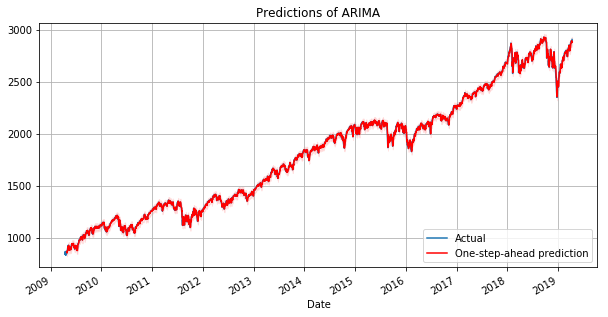

In [6]:
# Make one-step-ahead prediction
# Plot predictions against actual data
prediction = arima.predict(data, result, n_predict, graph=True)

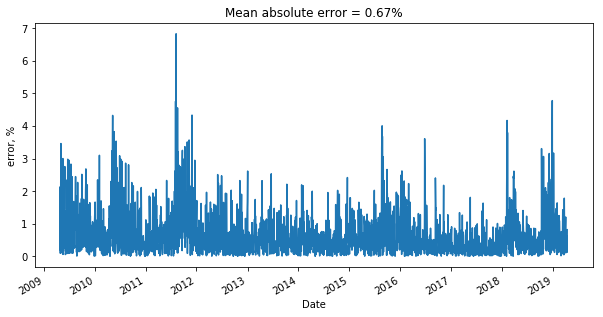

In [7]:
# Estimate prediction error
mean_abs_error = arima.error(data, prediction, graph=True)